#### Preprocessing Charging Sessions Dataset

First, we import important libraries needed for the following tasks.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

We import the necessary dataset (charging sessions of EVs) with the data of charging garages in Los Angeles.

In [2]:
data_raw = pd.read_csv("data/charging_sessions.csv")

Getting a first sight of the data by displaying the first 5 observations.

In [3]:
data_raw.head(5)

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [4]:
num_rows, num_columns = data_raw.shape
print(f"rows: {num_rows}, columns: {num_columns}")

rows: 66450, columns: 13


The data in the dataset contains 66.450 observation over 13 different variables. Next, we drop duplicates and have closer look at the different datatypes.

In [5]:
columns = [
    'connectionTime', 'disconnectTime', 'doneChargingTime', 'kWhDelivered',
    'sessionID', 'siteID', 'spaceID', 'stationID', 'timezone', 'userID', 'userInputs'
]
data_unique = data_raw.drop_duplicates(subset=columns)

In [6]:
dtypes_data = data_unique.dtypes.reset_index()
dtypes_data.columns = ['Row', 'Datetype']
print(dtypes_data)

                 Row Datetype
0         Unnamed: 0    int64
1                 id   object
2     connectionTime   object
3     disconnectTime   object
4   doneChargingTime   object
5       kWhDelivered  float64
6          sessionID   object
7             siteID    int64
8            spaceID   object
9          stationID   object
10          timezone   object
11            userID  float64
12        userInputs   object


We convert all the data into corresponding data types so that we can use them in the further analysis. 
The time-related data is given in the UTC time zone, but the garages are in Los Angeles. In order to obtain accurate information about the timestamps, the data must therefore be converted to the corresponding time zone (LosAngeles).  

In [7]:
data_unique['id'] = data_unique['id'].astype("string")
data_unique['connectionTime'] = pd.to_datetime(data_unique['connectionTime'], utc=True).dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
data_unique['disconnectTime'] = pd.to_datetime(data_unique['disconnectTime'], utc=True).dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
data_unique['doneChargingTime'] = pd.to_datetime(data_unique['doneChargingTime'], utc=True).dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
data_unique['sessionID'] = data_unique['sessionID'].astype("string")
data_unique['siteID'] = data_unique['siteID'].astype("int")
data_unique['spaceID'] = data_unique['spaceID'].astype("string")
data_unique['stationID'] = data_unique['stationID'].astype("string")
data_unique['timezone'] = data_unique['timezone'].astype("string")
data_unique['userID'] = data_unique['userID'].astype("string")
data_unique['sessionID'] = data_unique['sessionID'].astype("string")
data_unique['userInputs'] = data_unique['userInputs'].apply(lambda x: list(x) if isinstance(x, list) else [x])

The `unnamed` column is presumably an index from the riginal DataFrame and gets transferred into a column when reading the CSV-file. Since our data contains a unique ID for each entry, the unnamed-numbering is not needed and can be deleted.

In [8]:
data_unique = data_unique.drop('Unnamed: 0', axis=1)

print(data_unique.dtypes)

id                  string[python]
connectionTime      datetime64[ns]
disconnectTime      datetime64[ns]
doneChargingTime    datetime64[ns]
kWhDelivered               float64
sessionID           string[python]
siteID                       int64
spaceID             string[python]
stationID           string[python]
timezone            string[python]
userID              string[python]
userInputs                  object
dtype: object


In [9]:
print(data_unique.info())

<class 'pandas.core.frame.DataFrame'>
Index: 65037 entries, 0 to 65036
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                65037 non-null  string        
 1   connectionTime    65037 non-null  datetime64[ns]
 2   disconnectTime    65037 non-null  datetime64[ns]
 3   doneChargingTime  60950 non-null  datetime64[ns]
 4   kWhDelivered      65037 non-null  float64       
 5   sessionID         65037 non-null  string        
 6   siteID            65037 non-null  int64         
 7   spaceID           65037 non-null  string        
 8   stationID         65037 non-null  string        
 9   timezone          65037 non-null  string        
 10  userID            47822 non-null  string        
 11  userInputs        65037 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(1), object(1), string(6)
memory usage: 6.5+ MB
None


In [10]:
missing_values_count = data_unique.isnull().sum()
print(missing_values_count)

id                      0
connectionTime          0
disconnectTime          0
doneChargingTime     4087
kWhDelivered            0
sessionID               0
siteID                  0
spaceID                 0
stationID               0
timezone                0
userID              17215
userInputs              0
dtype: int64


By looking at the dataframe, you can see that `doneChargingTime` and `userID` have missing values.  

The missing values in userID can be explained by the fact that not every garage user is registered; therefore, some accounts are naturally absent. However, the missing entries in `doneChargingTime` appear unusual.

In [11]:
# create Table with missing values in doneChargingTimeb
miss_doneChargingTime = data_unique[data_unique['doneChargingTime'].isna()]
miss_doneChargingTime.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
3756,5ea3848df9af8b428bf97225,2020-04-08 09:36:53,2020-04-08 20:43:29,NaT,25.183,1_1_194_822_2020-04-08 16:36:53.316264,1,AG-1F12,1-1-194-822,America/Los_Angeles,507.0,"[[{'WhPerMile': 250, 'kWhRequested': 75.0, 'mi..."
3757,5ea4d60df9af8b46573f1ee7,2020-04-09 06:23:52,2020-04-09 10:59:02,NaT,14.136,1_1_193_827_2020-04-09 13:23:51.689520,1,AG-1F02,1-1-193-827,America/Los_Angeles,419.0,"[[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mi..."
3758,5ea4d60df9af8b46573f1ee8,2020-04-09 06:40:03,2020-04-09 14:43:22,NaT,14.203,1_1_178_823_2020-04-09 13:39:55.115497,1,AG-1F08,1-1-178-823,America/Los_Angeles,5065.0,"[[{'WhPerMile': 400, 'kWhRequested': 24.0, 'mi..."
3759,5ea4d60df9af8b46573f1ee9,2020-04-09 07:01:53,2020-04-09 09:33:40,NaT,13.041,1_1_178_828_2020-04-09 14:01:53.467693,1,AG-1F10,1-1-178-828,America/Los_Angeles,651.0,"[[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mi..."
3760,5ea4d60df9af8b46573f1eea,2020-04-09 08:01:06,2020-04-09 16:38:08,NaT,5.797,1_1_193_820_2020-04-09 15:01:06.343454,1,AG-1F04,1-1-193-820,America/Los_Angeles,466.0,"[[{'WhPerMile': 300, 'kWhRequested': 6.0, 'mil..."


Upon closer analysis of the missing entries for the charging time (`miss_doneChargingTime`), we found that all of them have normal values for the attribute `kWhDelivered`, indicating that current flow was indeed present.

(Removing this data from the dataframe would imply that the charging stations were free at those times, which is inaccurate and would skew predictions. Therefore, we decided to retain this data for now and, if necessary, exclude it during model training and predictions about parking space utilization after charging is complete.)

We calculate the the percentage of missing (NaN) values for each column.

In [12]:
data_unique.isnull().mean() * 100

id                   0.000000
connectionTime       0.000000
disconnectTime       0.000000
doneChargingTime     6.284115
kWhDelivered         0.000000
sessionID            0.000000
siteID               0.000000
spaceID              0.000000
stationID            0.000000
timezone             0.000000
userID              26.469548
userInputs           0.000000
dtype: float64

Let's calculate the percentage of data left after removing the missing values.

In [13]:
len(data_unique['doneChargingTime'].dropna())/len(data_unique['doneChargingTime']) * 100

93.71588480403462

After removing the columns with missing values, around 94% of the data is still intact which seems to be sufficient. So we first create a copy of the data set in order to then remove the missing values from ‘doneChargingTime’.

In [14]:
# Create a copy of the data before dropping NA values from doneChaargingTime
data_with_NA = data_unique.copy()

# Drop NA from doneChargingTime
data_unique.dropna(subset=['doneChargingTime'], inplace=True)

print(data_unique['doneChargingTime'].isnull().sum())

0


We can explore how the data is distributed in each column before and after removing null values by plotting histograms. This approach will enable us to compare the distribution trends in both scenarios.

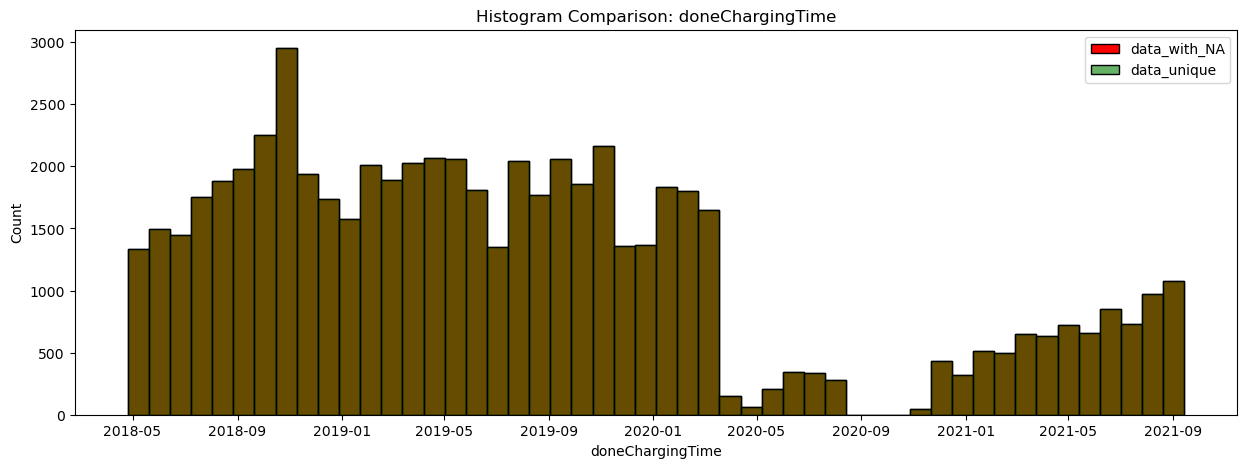

In [15]:
plt.figure(figsize=(15, 5))

# Histogram: Data with doneChargingTime NaT values
sns.histplot(data=data_with_NA, x='doneChargingTime', bins=50, color='red', alpha=1, kde=False, label='data_with_NA')

# Histogram: Data with removed doneChargingTime NaT values
sns.histplot(data=data_unique, x='doneChargingTime', bins=50, color='green', alpha=0.6, kde=False, label='data_unique')

plt.legend()

plt.title('Histogram Comparison: doneChargingTime')
plt.xlabel('doneChargingTime')
plt.ylabel('Count')

plt.show()


By comparing the histograms of the 'doneChargingTime' column before and after removing the null values, it is clear that the data distribution stays consistent. The overlapping histograms show that there is no major change in the distribution pattern after null values were removed.

In [16]:
filtered_data = data_unique[data_unique['doneChargingTime'] > data_unique['disconnectTime']]

filtered_data['time_difference'] = (filtered_data['doneChargingTime'] - filtered_data['disconnectTime']).dt.total_seconds()

average_difference = filtered_data['time_difference'].mean()

average_kwh_delivered = filtered_data['kWhDelivered'].mean()

other_cases = data_unique[data_unique['doneChargingTime'] <= data_unique['disconnectTime']]

average_kwh_delivered_other = other_cases['kWhDelivered'].mean()

print(f"Average Difference: {average_difference:.2f} seconds")
print(f"Average kWh (doneChargingTime > disconnectTime): {average_kwh_delivered:.2f} kWh")
print(f"Average kWh (doneChargingTime <= disconnectTime): {average_kwh_delivered_other:.2f} kWh")

Average Difference: 56.02 seconds
Average kWh (doneChargingTime > disconnectTime): 14.24 kWh
Average kWh (doneChargingTime <= disconnectTime): 11.38 kWh


In [17]:
filtered_data.head(10)

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,time_difference
12,5e23b149f9af8b5fe4b973db,2020-01-02 07:04:38,2020-01-02 14:08:39,2020-01-02 14:09:36,25.567,1_1_178_824_2020-01-02 15:04:38.051735,1,AG-1F07,1-1-178-824,America/Los_Angeles,528.0,"[[{'WhPerMile': 250, 'kWhRequested': 50.0, 'mi...",57.0
20,5e23b149f9af8b5fe4b973e3,2020-01-02 07:28:47,2020-01-02 11:01:54,2020-01-02 11:02:51,7.417,1_1_193_827_2020-01-02 15:28:46.685366,1,AG-1F02,1-1-193-827,America/Los_Angeles,1283.0,"[[{'WhPerMile': 350, 'kWhRequested': 42.0, 'mi...",57.0
25,5e23b149f9af8b5fe4b973e8,2020-01-02 07:42:05,2020-01-02 13:58:45,2020-01-02 13:59:42,36.701,1_1_179_797_2020-01-02 15:42:05.217965,1,AG-3F23,1-1-179-797,America/Los_Angeles,474.0,"[[{'WhPerMile': 400, 'kWhRequested': 32.0, 'mi...",57.0
26,5e23b149f9af8b5fe4b973e9,2020-01-02 07:57:24,2020-01-02 08:35:37,2020-01-02 08:36:34,3.689,1_1_179_781_2020-01-02 15:57:23.951170,1,AG-3F31,1-1-179-781,America/Los_Angeles,724.0,"[[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mil...",57.0
33,5e23b149f9af8b5fe4b973f0,2020-01-02 08:34:35,2020-01-02 10:49:41,2020-01-02 10:50:38,7.120,1_1_179_790_2020-01-02 16:34:34.999200,1,AG-3F19,1-1-179-790,America/Los_Angeles,2276.0,"[[{'WhPerMile': 600, 'kWhRequested': 18.0, 'mi...",57.0
45,5e23b149f9af8b5fe4b973fc,2020-01-02 10:41:22,2020-01-02 11:38:24,2020-01-02 11:39:23,5.430,1_1_191_812_2020-01-02 18:41:22.082480,1,AG-4F46,1-1-191-812,America/Los_Angeles,741.0,"[[{'WhPerMile': 400, 'kWhRequested': 32.0, 'mi...",59.0
49,5e23b149f9af8b5fe4b97400,2020-01-02 11:08:34,2020-01-02 14:52:36,2020-01-02 14:53:36,22.839,1_1_191_811_2020-01-02 19:08:34.209436,1,AG-4F42,1-1-191-811,America/Los_Angeles,1283.0,"[[{'WhPerMile': 350, 'kWhRequested': 42.0, 'mi...",60.0
51,5e23b149f9af8b5fe4b97402,2020-01-02 11:30:53,2020-01-02 15:18:39,2020-01-02 15:19:36,4.405,1_1_179_810_2020-01-02 19:30:53.010234,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[[{'WhPerMile': 250, 'kWhRequested': 10.0, 'mi...",57.0
53,5e23b149f9af8b5fe4b97404,2020-01-02 12:31:37,2020-01-02 18:21:37,2020-01-02 18:22:34,33.645,1_1_178_823_2020-01-02 20:31:37.206013,1,AG-1F08,1-1-178-823,America/Los_Angeles,337.0,"[[{'WhPerMile': 250, 'kWhRequested': 35.0, 'mi...",57.0
57,5e23b149f9af8b5fe4b97408,2020-01-02 14:46:56,2020-01-02 16:49:34,2020-01-02 16:50:34,13.005,1_1_179_809_2020-01-02 22:46:56.495691,1,AG-3F27,1-1-179-809,America/Los_Angeles,2276.0,"[[{'WhPerMile': 600, 'kWhRequested': 18.0, 'mi...",60.0


#### Outlier Detection

This analysis focuses on detecting outliers in the kWhDelivered column. We start by examining the statistical summary to understand the data distribution.

In [18]:
data_unique.describe()[['kWhDelivered']]

,kWhDelivered
count,60950.000000
mean,11.583268
min,0.501000
25%,5.013000
50%,8.991000
75%,13.984000
max,108.797242
std,10.153601


Although the mean is relatively sensitive to outliers, the mean of kWhDelivered is 11.58 while the maximum is 108.8. This shows that the maximum is an outlier. We make use of a boxplot and a histogram to visually summarize the distribution and identify potential outliers.

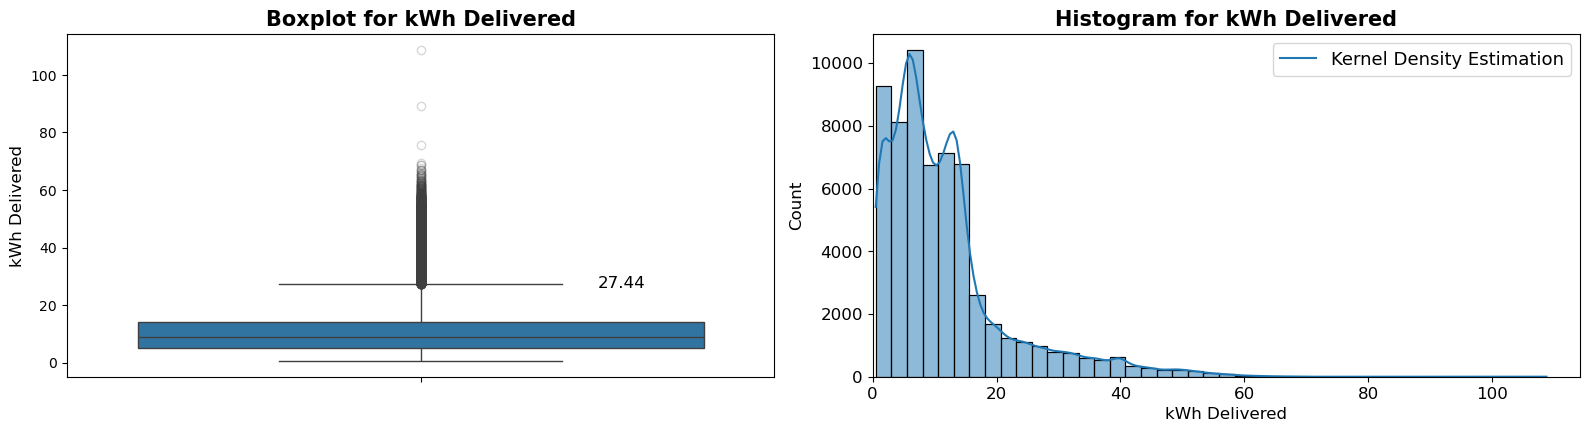

In [19]:
plt.figure(figsize=(16, 8))

q1 = data_unique['kWhDelivered'].quantile(0.25)
q3 = data_unique['kWhDelivered'].quantile(0.75)
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr

# Boxplot
plt.subplot(2, 2, 1)
sns.boxplot(data=data_unique, y='kWhDelivered', flierprops={'alpha': 0.2})
plt.title("Boxplot for kWh Delivered", fontsize=15, fontweight='bold')
plt.ylabel("kWh Delivered", fontsize=12)
plt.xlabel("")
plt.text(0.25, upper_whisker, f"{upper_whisker:.2f}", 
         ha='left', va='center', fontsize=12, color='black')

# Histogram
plt.subplot(2, 2, 2)
sns.histplot(data_unique['kWhDelivered'], kde=True, binwidth=2.5)
plt.title("Histogram for kWh Delivered", fontsize=15, fontweight='bold')
plt.xlabel("kWh Delivered", fontsize=12)
plt.ylabel("Count", fontsize=12) 
plt.legend(labels=["Kernel Density Estimation"], fontsize=13)

plt.xlim(left=0)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

Based on the two visualizations, it is evident that the majority of the values are quite low. The upper whisker of the boxplot is at 27.44, meaning it represents the largest value in the dataset that is less than or equal to Q3 + 1.5 * IQR. Values above this threshold are considered outliers. These become more frequent up to approximately 60. Only three observations fall between 75 and 110. The distribution is highly positively right skewed.

The following function calculates the IQR to detect outliers above the upper whisker.

In [20]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   iqr=q3-q1

   outliers = df[((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]

   return outliers

In [21]:
outliers = find_outliers_IQR(data_unique['kWhDelivered'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 5168
max outlier value: 108.79724166666666
min outlier value: 27.442


1        33.097
6        43.477
7        32.441
13       39.806
21       49.874
          ...  
65003    32.334
65005    30.030
65008    35.007
65024    30.198
65029    41.047
Name: kWhDelivered, Length: 5168, dtype: float64

The summary indicates that there are 5,168 outliers. The lowest outlier value is 27.44, as previously mentioned, while the maximum is 108.8.

In [22]:
data_unique[data_unique['kWhDelivered'] > 70]

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
18641,610c829df9af8b0580e98730,2021-07-20 15:16:54,2021-07-21 08:18:03,2021-07-21 08:19:00,108.797242,1_1_193_829_2021-07-20 18:27:33.500144,1,AG-1F03,1-1-193-829,America/Los_Angeles,378.0,"[[{'WhPerMile': 258, 'kWhRequested': 35.088, '..."
18643,610c829df9af8b0580e98732,2021-07-20 15:16:56,2021-07-21 08:18:16,2021-07-21 08:19:13,89.362732,1_1_194_818_2021-07-20 13:54:47.875453,1,AG-1F14,1-1-194-818,America/Los_Angeles,481.0,"[[{'WhPerMile': 360, 'kWhRequested': 86.4, 'mi..."
20986,5c60d02df9af8b149d7da395,2019-01-25 19:40:20,2019-01-26 14:36:03,2019-01-26 06:45:12,75.528000,2_39_91_437_2019-01-26 03:40:20.383123,2,CA-317,2-39-91-437,America/Los_Angeles,1225.0,"[[{'WhPerMile': 600, 'kWhRequested': 180.0, 'm..."


The high kWhDelivered values are rare but appear to be realistic given the long charging durations.

The following function replaces the outlier values that exceed the given upper limit with the median value of 'kWhDelivered'.

In [23]:
def cap_outliers(df, column, upper_limit):

    median = df[column].median()
    print(f"Median: {median}")

    upper_limit = upper_limit
    print(f"Upper limit: {upper_limit}")

    df[column] = np.where(
        df[column] > upper_limit,
        median,
        df[column]
    )
    return df


In [24]:
data_unique = cap_outliers(data_unique, 'kWhDelivered', 27)

Median: 8.991
Upper limit: 27


Replotting the resulting distribution after capping the outliers at 27.

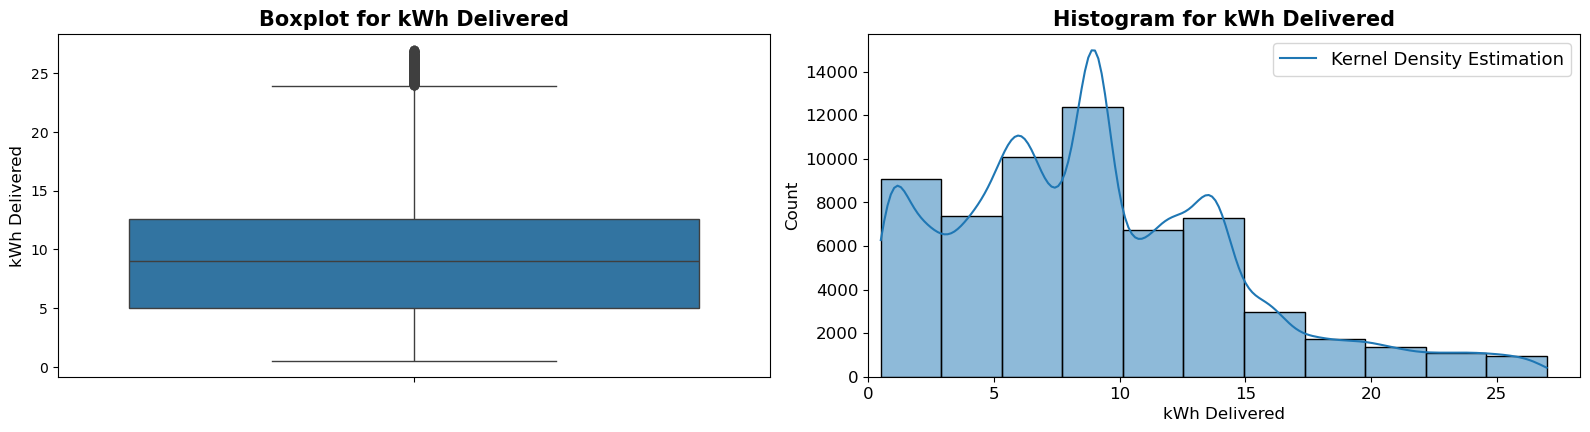

In [25]:
plt.figure(figsize=(16, 8))

# Boxplot
plt.subplot(2, 2, 1)
sns.boxplot(data=data_unique, y='kWhDelivered', flierprops={'alpha': 0.1})
plt.title("Boxplot for kWh Delivered", fontsize=15, fontweight='bold')
plt.ylabel("kWh Delivered", fontsize=12)
plt.xlabel("") 

# Histogram
plt.subplot(2, 2, 2)
sns.histplot(data_unique['kWhDelivered'], kde=True, binwidth=2.5)
plt.title("Histogram for kWh Delivered", fontsize=15, fontweight='bold')
plt.xlabel("kWh Delivered", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(labels=["Kernel Density Estimation"], fontsize=13)

plt.xlim(left=0)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

By capping the outliers at the upper whisker to the median, the distribution becomes more stable and less influenced by extreme values. The values concentrate more closely around the median, making the distribution more compact.

#### Extracting "userInputs" into a Separate Table

Process the column userInputs to ensure each entry is JSON-formatted and interpretable as a Python dictionary.

In [26]:
import json

data_unique['userInputs'] = data_unique['userInputs'].astype("string")

def format_user_input(entry):
    try:
        entry = entry[2:-2]
        entry = entry.replace("'", "\"").replace("True", "true").replace("False", "false")  
        return json.loads(entry)  
    except json.JSONDecodeError:
        return None  


data_unique['userInputs']= data_unique['userInputs'].apply(format_user_input)

This code extracts the contents of the userInputs column into a separate table for better clarity and organization of data. By splitting out userInputs, each nested entry can be analyzed individually, providing a more detailed view of the information stored within. This approach makes it easier to work with and understand the data structure, especially when userInputs contains multiple key-value pairs or complex JSON objects. By creating a dedicated table, each entry can be accessed, processed, and filtered independently, enhancing data readability and simplifying further analysis.

In [27]:
# Split nested lists in 'userInputs' into separate rows, resetting index for a clean DataFrame.
data_unique_splitted = data_unique.explode('userInputs', ignore_index=True)

# Select only specific columns 'id', 'userID', and 'userInputs' from the exploded DataFrame.
userInputs_data = data_unique_splitted[['id', 'userID', 'userInputs']]

# Rename the 'id' column to 'data_unique_id' for clarity.
userInputs_data = userInputs_data.rename(columns={'id': 'data_unique_id'})

# Add a new column 'id' with a unique sequential identifier for each row.
userInputs_data['id'] = range(1, len(userInputs_data) + 1)

# Expand the JSON data in 'userInputs' column to separate columns for each key-value pair.
userInputs_expanded = pd.json_normalize(userInputs_data['userInputs'])

# Concatenate the expanded data with the original DataFrame along columns (side by side).
userInputs_data = pd.concat([userInputs_data, userInputs_expanded], axis=1)

# Drop the original 'userInputs' column as it's no longer needed after expanding.
userInputs_data = userInputs_data.drop('userInputs', axis=1)

# Remove rows with missing values in critical columns 'userID', 'WhPerMile', and 'kWhRequested'.
userInputs_data = userInputs_data.dropna(subset=['userID', 'WhPerMile', 'kWhRequested'])

# Convert 'paymentRequired' column to a boolean type for correct data interpretation.
userInputs_data['paymentRequired'] = userInputs_data['paymentRequired'].astype(bool)

# Modify 'modifiedAt' column: extract only the date and time, convert to datetime in UTC, and localize to LA time.
userInputs_data['modifiedAt'] = userInputs_data['modifiedAt'].apply(
    lambda x: x.split(", ")[1].replace(" GMT", "") if isinstance(x, str) else x
)
userInputs_data['modifiedAt'] = pd.to_datetime(userInputs_data['modifiedAt'], format="%d %b %Y %H:%M:%S", utc=True, errors='coerce')
userInputs_data['modifiedAt'] = userInputs_data['modifiedAt'].dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)

# Modify 'requestedDeparture' column: extract only the date and time, convert to datetime in UTC, and localize to LA time.
userInputs_data['requestedDeparture'] = userInputs_data['requestedDeparture'].apply(
    lambda x: x.split(", ")[1].replace(" GMT", "") if isinstance(x, str) else x
)
userInputs_data['requestedDeparture'] = pd.to_datetime(userInputs_data['requestedDeparture'], format="%d %b %Y %H:%M:%S", utc=True, errors='coerce')
userInputs_data['requestedDeparture'] = userInputs_data['requestedDeparture'].dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)

#  drop userInputs in data_unique table since its not needed anymore
data_unique = data_unique.drop('userInputs', axis=1)


In [28]:
# split the dataset in two different. One for the station with siteID 1 and one for the station with the siteID 2 for further analysis
data_1 = data_unique[data_unique['siteID']==1]
data_2 = data_unique[data_unique['siteID']==2]

#### Preprocessing Weather Burbank Dataset

The weather dataset is also imported and duplicates are removed. Although there are none, we have carried out this step to be on the safe side.  
The data was converted to the corresponding data types and the time was adjusted to the los-angeles time zone again.  
There is some missing data in this data set for the `temperature` and the `cloud_cover`. However, these are difficult to reproduce and are therefore deleted from the data set.

In [29]:
weather_raw=pd.read_csv("data/weather_burbank_airport.csv")

# delete duplicates
columns = [
    'city', 'timestamp', 'temperature', 'cloud_cover',
    'cloud_cover_description', 'pressure', 'windspeed', 'precipitation', 'felt_temperature'
]
weather_unique = weather_raw.drop_duplicates(subset=columns)

#Transform to correct Data Types
weather_unique['city']=weather_raw['city'].astype('string')
weather_unique['timestamp'] = pd.to_datetime(weather_raw['timestamp'], utc=True).dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
weather_unique['cloud_cover_description']=weather_raw['cloud_cover_description'].astype('string')

# drop with missing values
weather_unique = weather_unique.dropna(subset=['temperature'])
weather_unique = weather_unique.dropna(subset=['cloud_cover'])

print(weather_unique.dtypes)

city                       string[python]
timestamp                  datetime64[ns]
temperature                       float64
cloud_cover                       float64
cloud_cover_description    string[python]
pressure                          float64
windspeed                         float64
precipitation                     float64
felt_temperature                  float64
dtype: object


# 2. Descriptive Analytics

### a) Temporal patterns and Seasonality

We will begin by analyzing the temporal patterns and seasonality of charging events. This analysis will focus on understanding how charging behavior evolves over time and identifying any recurring seasonal trends. Our goal is to uncover initial patterns and propose possible hypotheses to explain these phenomena.

It is important to note that a charging event is primarily considered as the duration from the connection time to the disconnection time. However, we will also examine the perspective where the event is measured from the connection time to the "done charging" time.

#### Daily patterns

Histogram of charging sessions throughout the day, broken down by each hour of the day. The calculation spans from the connection time to the disconnection time.

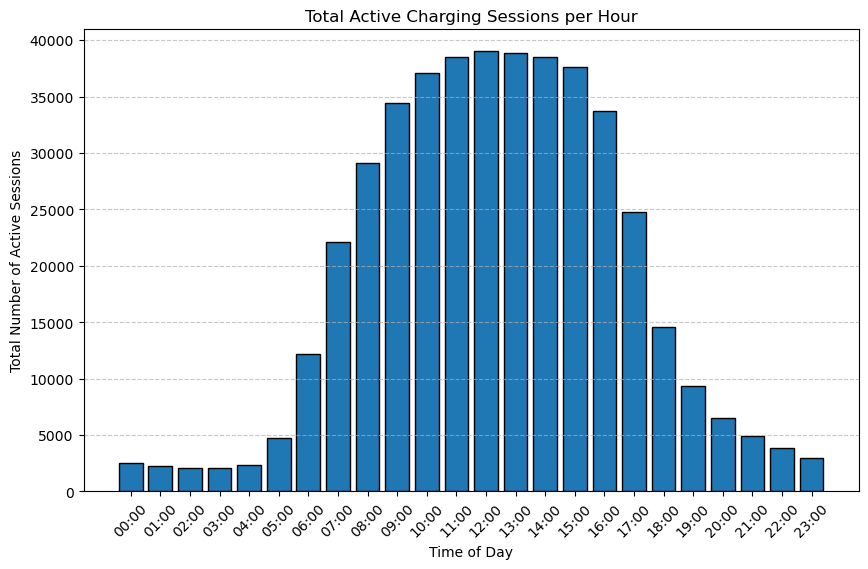

In [58]:
# Initialize an array to store the number of active charging sessions for each hour
active_sessions_by_hour = np.zeros(24)

# Loop through each row to calculate active sessions for each hour
for index, row in data_unique.iterrows():
    # Extract the start and end hours of the charging session
    start_hour = row['connectionTime'].hour
    end_hour = row['disconnectTime'].hour

    # Handle sessions that span across midnight
    if row['disconnectTime'].date() > row['connectionTime'].date():
        end_hour += 24  # Extend the end hour beyond midnight

    # Increment the active sessions for each hour within the session's range
    for hour in range(start_hour, end_hour + 1):
        active_sessions_by_hour[hour % 24] += 1  # %24 to wrap around to 0–23 hours

# Create time labels for the x-axis in "HH:00" format
time_labels = [f"{hour:02d}:00" for hour in range(24)]

# Visualization: Histogram of total active charging sessions per hour
plt.figure(figsize=(10, 6))
plt.bar(range(24), active_sessions_by_hour, tick_label=time_labels, width=0.8, edgecolor="black")
plt.title('Total Active Charging Sessions per Hour')
plt.xlabel('Time of Day')
plt.ylabel('Total Number of Active Sessions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for the y-axis
plt.ticklabel_format(style='plain', axis='y')  # Ensure plain format for y-axis
plt.show()

Histogram of the actual charging process required to fully charge a vehicle throughout the day, broken down by each hour of the day. The calculation spans from the connection time to the done charging time.

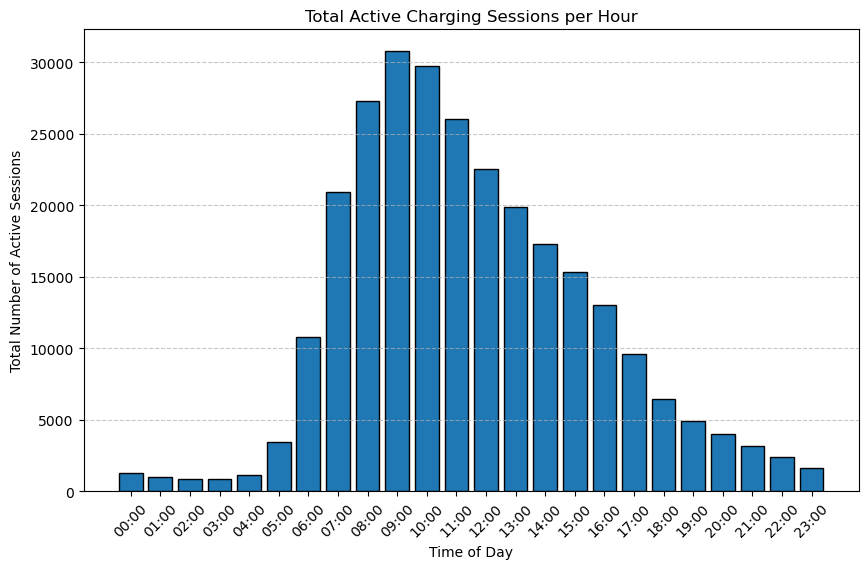

In [59]:
# Initialize an array to store the number of active charging sessions for each hour
active_sessions_by_hour = np.zeros(24)

# Loop through each row to calculate active sessions for each hour
for index, row in data_unique.iterrows():
    # Extract the start and end hours of the charging session
    start_hour = row['connectionTime'].hour
    end_hour = row['doneChargingTime'].hour

    # Handle sessions that span across midnight
    if row['doneChargingTime'].date() > row['connectionTime'].date():
        end_hour += 24  # Extend the end hour beyond midnight

    # Increment the active sessions for each hour within the session's range
    for hour in range(start_hour, end_hour + 1):
        active_sessions_by_hour[hour % 24] += 1  # %24 to wrap around to 0–23 hours

# Create time labels for the x-axis in "HH:00" format
time_labels = [f"{hour:02d}:00" for hour in range(24)]

# Visualization: Histogram of total active charging sessions per hour
plt.figure(figsize=(10, 6))
plt.bar(range(24), active_sessions_by_hour, tick_label=time_labels, width=0.8, edgecolor="black")
plt.title('Total Active Charging Sessions per Hour')
plt.xlabel('Time of Day')
plt.ylabel('Total Number of Active Sessions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for the y-axis
plt.ticklabel_format(style='plain', axis='y')  # Ensure plain format for y-axis
plt.show()

Histogram of connection times throughout the day, categorized by each hour of the day.

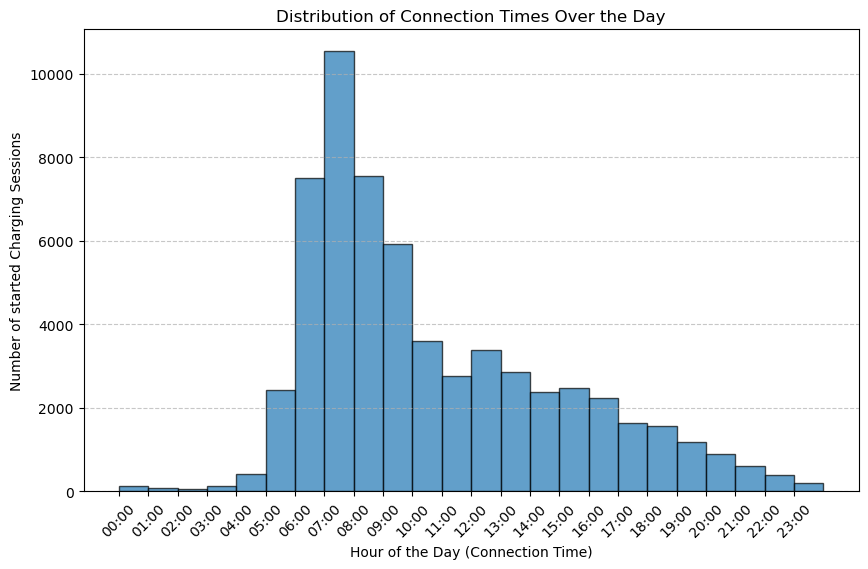

In [35]:
# Plot a histogram to show the distribution of connection times over the day
plt.figure(figsize=(10, 6))
plt.hist(data_unique['connectionHour'], bins=24, range=(0, 24), edgecolor='black', alpha=0.7)
plt.title('Distribution of Connection Times Over the Day')
plt.xlabel('Hour of the Day (Connection Time)')
plt.ylabel('Number of started Charging Sessions')
plt.xticks(range(24), [f"{hour:02d}:00" for hour in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Histogram of the disconnection times and done charging times throughout the day, categorized by each hour of the day.

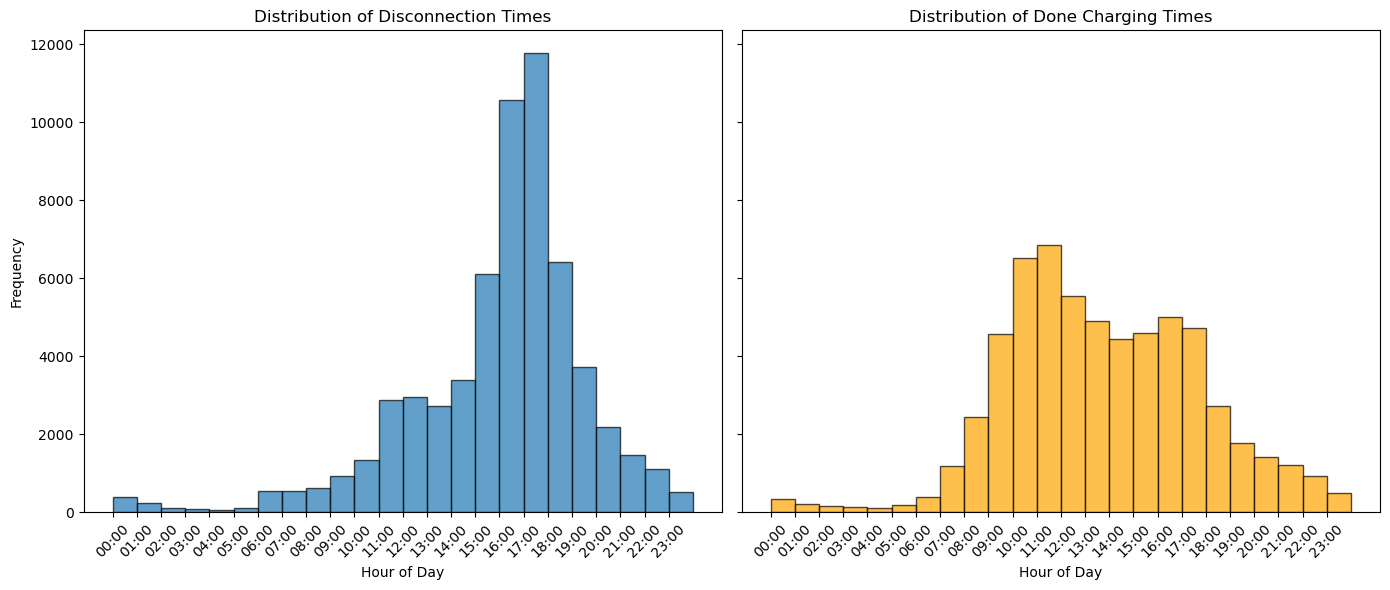

In [45]:
# Extract hours from 'disconnectTime' and 'doneChargingTime' for distribution analysis
disconnect_hours = data_unique['disconnectTime'].dt.hour
done_charging_hours = data_unique['doneChargingTime'].dt.hour

# Create subplots for the histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot histogram for disconnection times
axes[0].hist(disconnect_hours, bins=24, range=(0, 24), edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Disconnection Times')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(range(0, 24))
axes[0].set_xticklabels([f"{hour:02d}:00" for hour in range(24)], rotation=45)

# Plot histogram for done charging times
axes[1].hist(done_charging_hours, bins=24, range=(0, 24), edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Distribution of Done Charging Times')
axes[1].set_xlabel('Hour of Day')
axes[1].set_xticks(range(0, 24))
axes[1].set_xticklabels([f"{hour:02d}:00" for hour in range(24)], rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

The analysis of daily patterns reveals that most charging sessions occur between 7:00 AM and 5:00 PM. Within the context of the data, this suggests that these times correspond to when most individuals are either at the university or at work. This observation is further supported by the detailed examination of connection times and disconnection times for each hour.

Additionally, it is noteworthy that the charging sessions, measured from the connection time to the disconnection time, are generally longer than the actual charging process required to fully charge a vehicle (measured from the connection time to the done charging time). This indicates that vehicles often remain connected to the charging station well after they are fully charged.

#### Weekly patterns

Bar chart of charging events distributed across the weekdays.

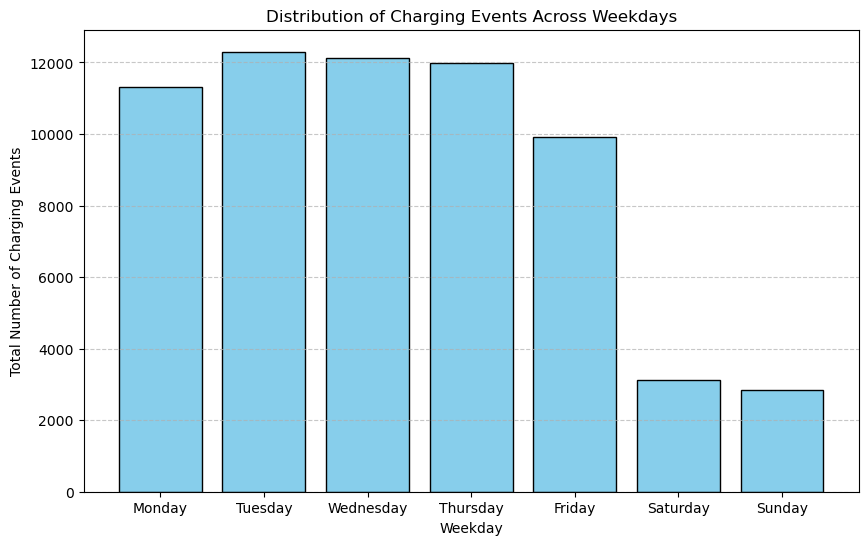

In [61]:
# Extract weekdays (0=Monday, 6=Sunday) from 'connectionTime'
data_unique['weekday'] = data_unique['connectionTime'].dt.dayofweek  # Add a weekday column

# Create a list of weekday names for labeling
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Initialize an array to count active sessions for each weekday
active_sessions_by_weekday = np.zeros(7)

# Calculate active charging sessions for each weekday
for index, row in data_unique.iterrows():
    # Get the range of days spanned by the charging event
    start_date = row['connectionTime'].date()
    end_date = row['disconnectTime'].date()
    
    # If the session spans multiple days
    if start_date != end_date:
        days_spanned = pd.date_range(start=start_date, end=end_date, freq='D')
        for day in days_spanned:
            active_sessions_by_weekday[day.weekday()] += 1
    else:
        # Single-day session
        active_sessions_by_weekday[start_date.weekday()] += 1

# Plot the distribution as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(7), active_sessions_by_weekday, tick_label=weekday_labels, color='skyblue', edgecolor='black')
plt.title('Distribution of Charging Events Across Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Total Number of Charging Events')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Nominal analysis of total charging sessions differentiated between weekdays and weekends.

In [67]:
# Extract weekday (0 = Monday, 6 = Sunday) from 'connectionTime'
data_unique['weekday'] = data_unique['connectionTime'].dt.dayofweek

# Filter sessions for weekdays (0-4) and weekends (5-6)
weekday_sessions = data_unique[data_unique['weekday'] < 5]  # Monday to Friday
weekend_sessions = data_unique[data_unique['weekday'] >= 5]  # Saturday and Sunday

# Count sessions for weekdays and weekends
weekday_count = len(weekday_sessions)
weekend_count = len(weekend_sessions)
total_count = weekday_count + weekend_count

# Calculate the percentage of sessions on the weekend
weekend_percentage = (weekend_count / total_count) * 100

# Print results
print(f"Charging sessions during the week (Monday to Friday): {weekday_count}")
print(f"Charging sessions during the weekend (Saturday and Sunday): {weekend_count}")
print(f"Total charging sessions: {total_count}")
print(f"The percentage of charging sessions on the weekend is {weekend_percentage:.2f}%.")

Charging sessions during the week (Monday to Friday): 55748
Charging sessions during the weekend (Saturday and Sunday): 5202
Total charging sessions: 60950
The percentage of charging sessions on the weekend is 8.53%.


Heatmap for analyzing weekdays categorized by hours and the distribution of connection times.

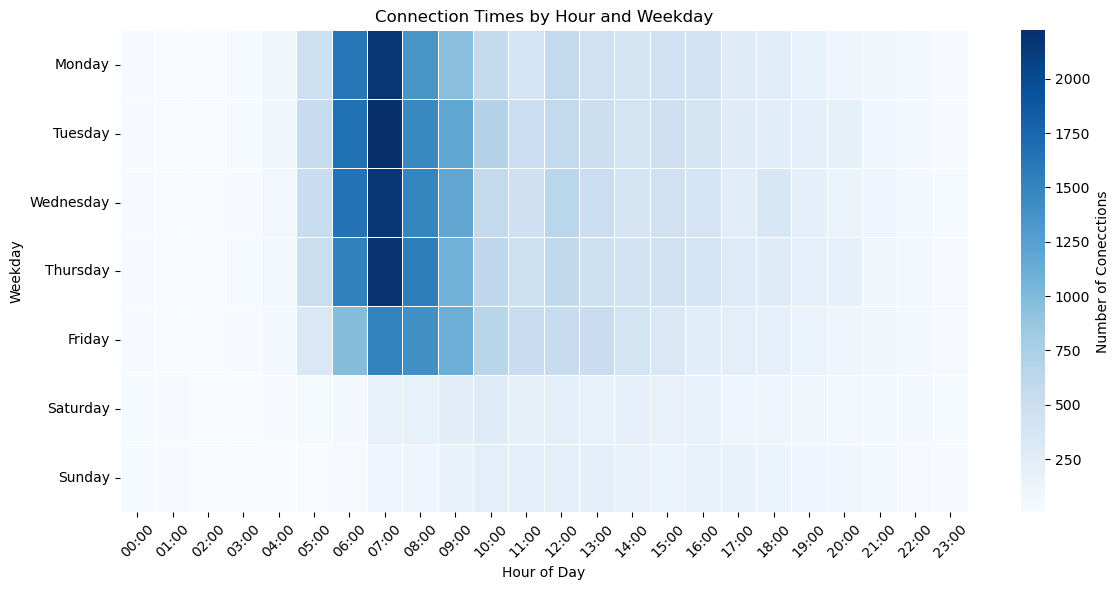

In [68]:
# Extract weekday and hour from connectionTime
data_unique['weekday'] = data_unique['connectionTime'].dt.dayofweek  # 0=Monday, 6=Sunday
data_unique['hour'] = data_unique['connectionTime'].dt.hour

# Create a pivot table to count charging events for each combination of weekday and hour
heatmap_data = data_unique.pivot_table(
    index='weekday', 
    columns='hour', 
    values='connectionTime', 
    aggfunc='count', 
    fill_value=0
)

# Define weekday labels for the heatmap
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=False, fmt="d", linewidths=0.5, cbar_kws={'label': 'Number of Conecctions'})
plt.title('Connection Times by Hour and Weekday')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.yticks(ticks=np.arange(7) + 0.5, labels=weekday_labels, rotation=0)
plt.xticks(ticks=np.arange(24) + 0.5, labels=[f"{h:02d}:00" for h in range(24)], rotation=45)
plt.tight_layout()
plt.show()

The analysis of weekly patterns in charging events reveals a clear trend: there are significantly more charging sessions on weekdays compared to weekends (only 8.53% of the total charging sessions are on Weekends). Starting from Friday, the number of sessions gradually declines, with a sharp drop on Saturday and Sunday. In the context of the data, this suggests that most individuals charge their vehicles during weekdays, while they are at work or university. This behavior aligns with the analysis of the daily patterns.


#### Seasonal patterns

Bar chart showing the distribution of charging sessions throughout the year, categorized by seasons.

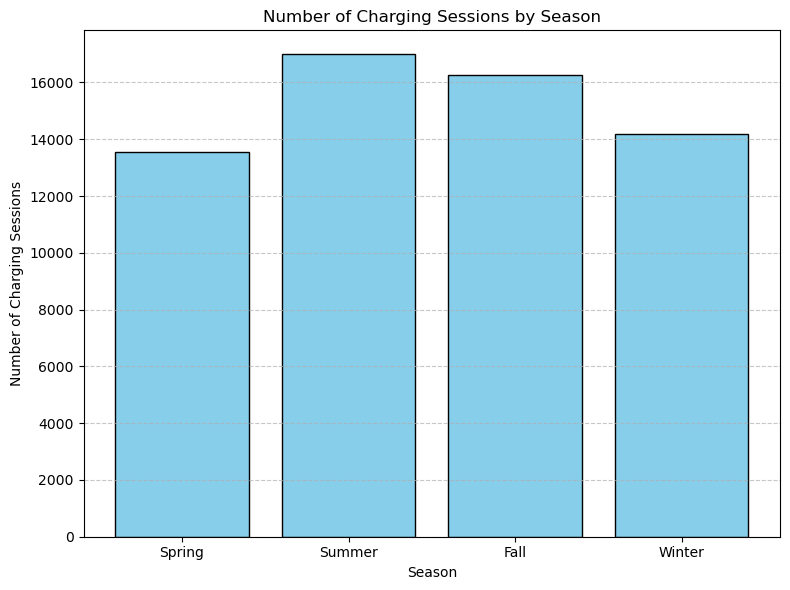

In [52]:
# Define a function to map months to seasons
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Use groupby to count sessions by season
sessions_by_season = (
    data_unique['connectionTime']
    .dt.month
    .map(get_season)  # Map months to seasons
    .value_counts()
    .reindex(['Spring', 'Summer', 'Fall', 'Winter'])  # Sort seasons
)

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(sessions_by_season.index, sessions_by_season.values, color='skyblue', edgecolor='black')
plt.title('Number of Charging Sessions by Season')
plt.xlabel('Season')
plt.ylabel('Number of Charging Sessions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Calculation of correlations between charging events and individual weather factors.

In [89]:
# Extract month for grouping
data_unique['month'] = data_unique['connectionTime'].dt.month
weather_unique['month'] = weather_unique['timestamp'].dt.month

# Aggregate monthly charging sessions
monthly_sessions = data_unique.groupby('month').size().rename('charging_sessions')

# Select only numeric columns for weather and aggregate monthly means
numeric_weather_cols = weather_unique.select_dtypes(include=['float64', 'int64']).columns
monthly_weather = weather_unique.groupby('month')[numeric_weather_cols].mean()

# Merge weather data with charging sessions
monthly_data = pd.merge(monthly_sessions, monthly_weather, left_index=True, right_index=True)

# Calculate correlations
correlations = monthly_data.corr()

# Display the correlations for charging sessions
charging_correlations = correlations['charging_sessions'].sort_values(ascending=False)
print("Correlations with Charging Sessions:\n", charging_correlations)


Correlations with Charging Sessions:
 charging_sessions    1.000000
cloud_cover          0.694439
temperature          0.669904
felt_temperature     0.667264
windspeed           -0.018012
pressure            -0.552198
precipitation       -0.593875
Name: charging_sessions, dtype: float64


Diagrams for analyzing the correlation between weather factors, seasons, and charging sessions, divided into positively correlated and negatively correlated weather factors.

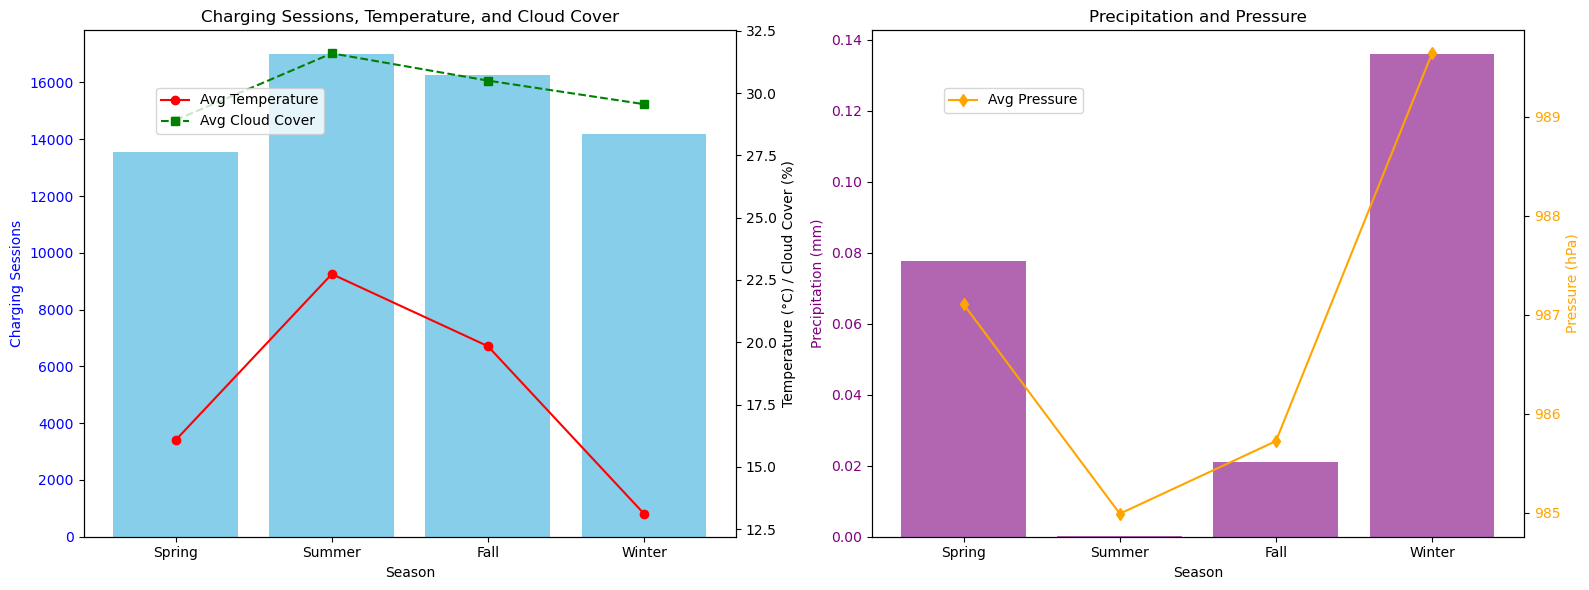

In [90]:
# Assign seasons to weather and charging session data
data_unique['season'] = data_unique['connectionTime'].dt.month.map(get_season)
weather_unique['season'] = weather_unique['timestamp'].dt.month.map(get_season)

# Aggregate Charging Sessions by Season
charging_sessions_by_season = data_unique.groupby('season').size()

# Select only numeric columns for weather data
numeric_weather_cols = weather_unique.select_dtypes(include=['float64', 'int64']).columns

# Aggregate Weather Data by Season (Average for numeric columns only)
weather_by_season = weather_unique.groupby('season')[numeric_weather_cols].mean()

# Combine Charging Sessions and Weather Data
seasonal_data = pd.DataFrame({
    'charging_sessions': charging_sessions_by_season,
    'avg_temperature': weather_by_season['temperature'],
    'avg_cloud_cover': weather_by_season['cloud_cover'],
    'avg_precipitation': weather_by_season['precipitation'],
    'avg_pressure': weather_by_season['pressure']
}).reindex(['Spring', 'Summer', 'Fall', 'Winter'])

# Create a figure with two side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- First Plot: Charging Sessions, Temperature, and Cloud Cover ---
ax1.bar(seasonal_data.index, seasonal_data['charging_sessions'], color='skyblue', label='Charging Sessions')
ax1.set_ylabel('Charging Sessions', color='blue')
ax1.set_xlabel('Season')
ax1.tick_params(axis='y', labelcolor='blue')

# Add Secondary Axis for Temperature and Cloud Cover
ax1_2 = ax1.twinx()
ax1_2.plot(seasonal_data.index, seasonal_data['avg_temperature'], color='red', marker='o', label='Avg Temperature')
ax1_2.plot(seasonal_data.index, seasonal_data['avg_cloud_cover'], color='green', marker='s', linestyle='--', label='Avg Cloud Cover')
ax1_2.set_ylabel('Temperature (°C) / Cloud Cover (%)', color='black')
ax1_2.tick_params(axis='y', labelcolor='black')

ax1.set_title('Charging Sessions, Temperature, and Cloud Cover')
ax1_2.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# --- Second Plot: Precipitation and Pressure ---
ax2.bar(seasonal_data.index, seasonal_data['avg_precipitation'], color='purple', alpha=0.6, label='Avg Precipitation')
ax2.set_ylabel('Precipitation (mm)', color='purple')
ax2.set_xlabel('Season')
ax2.tick_params(axis='y', labelcolor='purple')

# Add Secondary Axis for Pressure
ax2_2 = ax2.twinx()
ax2_2.plot(seasonal_data.index, seasonal_data['avg_pressure'], color='orange', marker='d', label='Avg Pressure')
ax2_2.set_ylabel('Pressure (hPa)', color='orange')
ax2_2.tick_params(axis='y', labelcolor='orange')

ax2.set_title('Precipitation and Pressure')
ax2_2.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Heatmaps for analyzing the daily connection and disconnection times categorized by seasons.

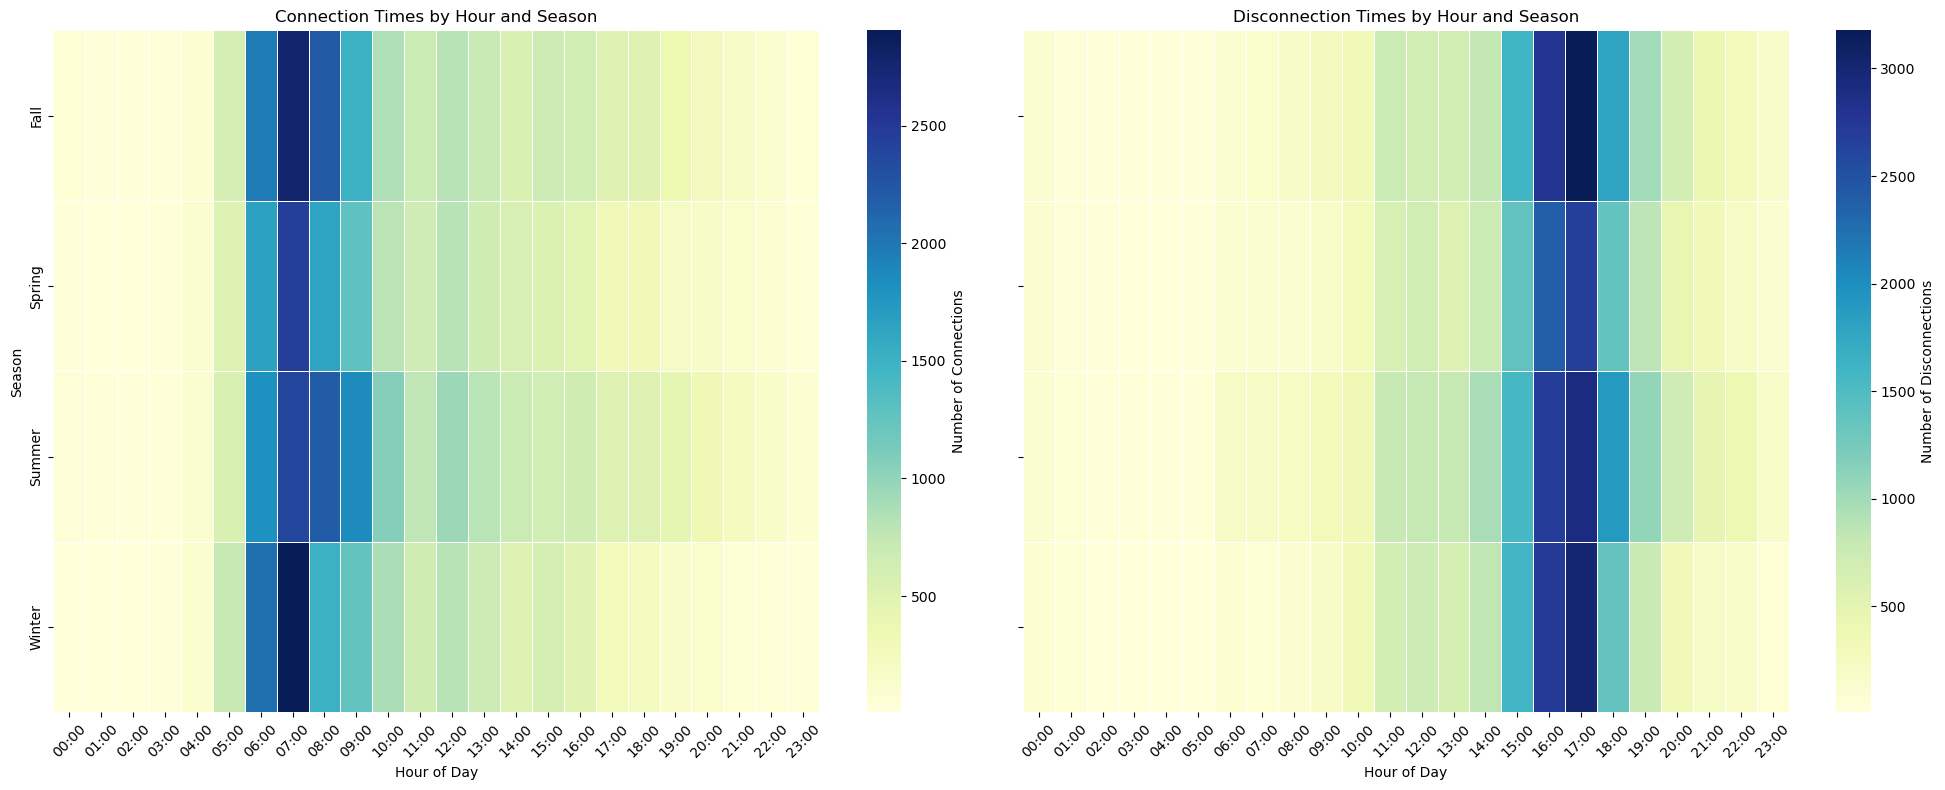

In [88]:
# Map months to seasons
data_unique['season'] = data_unique['connectionTime'].dt.month.map(get_season)
data_unique['connection_hour'] = data_unique['connectionTime'].dt.hour
data_unique['disconnection_hour'] = data_unique['disconnectTime'].dt.hour

# Create pivot tables for the heatmaps
connection_heatmap_data = data_unique.pivot_table(
    index='season', 
    columns='connection_hour', 
    values='connectionTime', 
    aggfunc='count', 
    fill_value=0
)

disconnection_heatmap_data = data_unique.pivot_table(
    index='season', 
    columns='disconnection_hour', 
    values='disconnectTime', 
    aggfunc='count', 
    fill_value=0
)

# Plot the heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Connection Time Heatmap
sns.heatmap(
    connection_heatmap_data, 
    cmap='YlGnBu', 
    annot=False, 
    fmt="d", 
    linewidths=0.5, 
    cbar_kws={'label': 'Number of Connections'}, 
    ax=axes[0]
)
axes[0].set_title('Connection Times by Hour and Season')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Season')
axes[0].set_xticks(np.arange(24) + 0.5)
axes[0].set_xticklabels([f"{h:02d}:00" for h in range(24)], rotation=45)

# Disconnection Time Heatmap
sns.heatmap(
    disconnection_heatmap_data, 
    cmap='YlGnBu', 
    annot=False, 
    fmt="d", 
    linewidths=0.5, 
    cbar_kws={'label': 'Number of Disconnections'}, 
    ax=axes[1]
)
axes[1].set_title('Disconnection Times by Hour and Season')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('')  # Remove duplicate ylabel
axes[1].set_xticks(np.arange(24) + 0.5)
axes[1].set_xticklabels([f"{h:02d}:00" for h in range(24)], rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

The analysis of seasonal patterns reveals that the distribution of charging sessions varies across seasons. Charging sessions are most frequent in summer and fall, while winter and spring see the lowest activity levels. Further analysis indicates that this behavior correlates with weather factors: high temperatures and cloudy skies show a positive correlation with charging sessions, while precipitation and pressure have a negative correlation.

A potential hypothesis to explain this pattern is that people engage in more outdoor activities during summer and fall, leading to increased vehicle usage and a greater need for charging.

Moreover, connection and disconnection times are slightly more spread out during the summer compared to other seasons. This suggests a higher level of activity and flexibility in people’s schedules during the summer months. This seasonal variation in behavior highlights the importance of considering both weather conditions and human activity patterns when analyzing charging infrastructure usage.